![Banner](ruta_de_la_imagen.jpg)

# EDA Análisis exploratorio de datos

Luego del proceso de Extracción, Transformación y Carga (ETL) que culminó en la creación del conjunto de datos consolidado **'homicidios_cleaned.csv (productos de la unión de 'HECHOS' y 'VICTIMAS' de los archivos homicidios.xlsx ), procederemos al Análisis Exploratorio de Datos (EDA) que no es más que un acto de inmersión en el compendio completo de eventos trágicos que queremos explorar y entender a fondo.

Durante el EDA, nos sumergimos en este conjunto de datos para comprender su estructura, abordar posibles outliers, identificar duplicados y gestionar valores faltantes. La riqueza de este análisis radica en la capacidad de revelar patrones, tendencias y relaciones entre variables, todo respaldado por visualizaciones pertinentes. A través de este proceso, buscamos extraer información valiosa que impulse futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires - Argentina.

⚠️ **Asegúrese de instalar las siguientes bibliotecas antes de ejecutar el código**

- numpy
- pandas
- matplotlib
- seaborn
- geopandas
- geojson
- folium
- re
Puede instalar estas bibliotecas debe abrir una terminal o ventana de línea de comandos y ejecutar el siguiente comando:

*`pip install pandas matplotlib`*

## 1. Importar Librerías

In [1]:
import re
import sketch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson
import folium
from folium.plugins import HeatMap
from summarytools import dfSummary

## 2. Ingestar Datos

En la etapa inicial de nuestro proceso, abordamos el archivo original **'homicidios.xlsx', cada uno compuesto por dos hojas de datos: HECHOS y VICTIMAS. Durante la fase de Extracción, Transformación y Carga (ETL), optamos por fusionar estas hojas mediante un merge, generando así un archivo resultante: **'homicidios_cleaned.csv. Este archivo han sido sometidos a un proceso exhaustivo de tratamiento y limpieza de datos.

In [2]:
# Cargar dataset
df= pd.read_csv("siniestos_limpio.csv")
df.head(3)

,Id,Fecha,Año,Mes,Día,Día semana,Hora completa,Hora,Num víctimas,Participantes,...,Calle,Cruce,Dirección normalizada,Comuna,Barrios,Xy (caba),Coordenada x,Coordenada y,Pos x,Pos y
0,2016-0001,2016-01-01,2016.0,1.0,1.0,Viernes,04:00:00,4.0,1,MOTO-AUTO,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,Point (98896.78238426 93532.43437792),98896.782384,93532.434378,-58.475340,-34.687570
1,2016-0002,2016-01-02,2016.0,1.0,2.0,Sabado,01:15:00,1.0,1,AUTO-PASAJEROS,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,Point (95832.05571093 95505.41641999),95832.055711,95505.416420,-58.508775,-34.669777
2,2016-0003,2016-01-03,2016.0,1.0,3.0,Domingo,07:00:00,7.0,1,MOTO-AUTO,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,Point (106684.29090040 99706.57687843),106684.290900,99706.576878,-58.390403,-34.631894


## 3. Exploración del Conjunto de Datos: 'homicidios_cleaned'

Exploracion de variables categoricas en  Siniestro Viales:

+ **Frecuencia de siniestros por categoría:** Puedes analizar la frecuencia de siniestros viales en función de variables categóricas como el tipo de vehículo involucrado (automóvil, motocicleta, camión), el tipo de accidente (choque frontal, colisión trasera, atropello), el estado del clima al momento del accidente (soleado, lluvioso, nevado), etc.

+ **Gravedad de los siniestros por categoría:** Puedes examinar la gravedad de los accidentes de tráfico en relación con variables categóricas como la edad del conductor (joven, adulto, anciano), la hora del día (mañana, tarde, noche), el día de la semana (laboral, fin de semana), etc.

+ **Tendencias a lo largo del tiempo:** Puedes analizar cómo ciertas variables categóricas han evolucionado con el tiempo, como la frecuencia de accidentes por tipo de vehículo a lo largo de los años, o la distribución de la gravedad de los accidentes en diferentes temporadas del año.

In [3]:
df['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', nan, 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [4]:
df['Rol'].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

In [5]:
df['Num víctimas'].unique()

array([1, 2, 0, 3], dtype=int64)

In [6]:
df['Rango etario'].unique()

array(['Menos de 20', 'Entre 61-80', ' Entre 21- 40', 'Entre 41-60',
       'Más de 80'], dtype=object)

In [7]:
df['Tipo de calle'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', nan, 'AUTOPISTA'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    702 non-null    float64
 3   Mes                    702 non-null    float64
 4   Día                    702 non-null    float64
 5   Día semana             702 non-null    object 
 6   Hora completa          702 non-null    object 
 7   Hora                   701 non-null    float64
 8   Num víctimas           717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    int64  
 15  Rango 

El conjunto de datos consta de 717 entradas y 28 columnas. A continuación, se presenta un resumen de las columnas disponibles:
`franja_hora` 

 `id`  Identificador único del siniestro (tipo: object).

`Fecha`  Fecha del siniestro (tipo: object).

`Año`  Año del hecho (tipo: float64).

`Mes`  Mes del hecho (tipo: float64).

`Dia`  Día del hecho (tipo: float64).

`Dia semana`  Día del hecho (tipo: object).

`Hora completa`  Hora del siniestro (tipo: object).

`Hora`  Hora del siniestro (tipo: float64).

`Num victimas`  Número de víctimas involucradas en el siniestro (tipo: int64).

`Participantes`   Participante del siniestro(tipo: object).

`Rol`  Rol específico (tipo: category).

`Acusado`  Tipo de vehículo acusado (tipo: category).

`Victima`  Tipo de vehículo de la víctima (tipo: category).

`Sexo`  Género de las personas involucradas (tipo: category).

`Edad`  Edad de las personas involucradas (tipo: category).

`Rango etario`  Rango de edad  de las personas involucradas (tipo: category).

`Fecha fallecimiento`  Fecha fallecimiento victima (tipo: objecy).

`Lugar del hecho`  Fecha fallecimiento victima (tipo: objecy).

`Tipo de calle`  Tipo de calle: Avenida, Autopista Gral Paz, Calle o Esquina donde ocurrio el siniestro(tipo: objecy).

`Calle`  Calle en donde ocurrio el siniestro(tipo: objecy).

`Cruce`  Cruze donde ocurrio el siniestro (tipo: objecy).

`Direccion normalizada` Dirección donde ocurrio el siniestro (tipo: objecy).

`Xy`  Coordenadas Latitud y Longitud CABA (tipo:object).

`Coordenada x`   Coordenadas Longitud  CABA (tipo: object).

`Coordenada y`  Coordenadas Latitud CABA (tipo: object).

`Pos x`   Coordenadas Longitud  CABA (tipo: object).

`Pos y`   Coordenadas Latitud  CABA (tipo: object).


In [9]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                       Nulos  Porcentaje
Id                         0    0.000000
Fecha                     15    2.092050
Año                       15    2.092050
Mes                       15    2.092050
Día                       15    2.092050
Día semana                15    2.092050
Hora completa             15    2.092050
Hora                      16    2.231520
Num víctimas               0    0.000000
Participantes             15    2.092050
Rol                        0    0.000000
Acusado                   15    2.092050
Victima                   15    2.092050
Sexo                       0    0.000000
Edad                       0    0.000000
Rango etario               0    0.000000
Fecha fallecimiento       69    9.623431
Lugar del hecho           15    2.092050
Tipo de calle             15    2.092050
Calle                     15    2.092050
Cruce                    177   24.686192
Dirección normalizada     15    2.092050
Comuna                    15    2.092050
Barrios         

Estoy fundamentando el análisis en la identificación de datos nulos los cuales fueron tratados durante la fase de ETL. Aunque no se logró la imputación completa de todos los nulos, opté por no eliminar registros con el fin de evitar resultados sesgados. Al observar los porcentajes obtenidos, destacamos:

**Análisis del DataFrame 'homicidios_df':**
- La columna 'franja_hora' tiene solo un valor nulo (0.14%), lo cual no es significativo.
- Las columnas 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo' y 'edad' tienen algunos nulos, pero en términos porcentuales son relativamente bajos.

### Mapa Boxplot | Outliers

Se realiza la busqueda de datos con valores atípicos en las features, y se analiza si es necesario eliminarlos.  


El gráfico que estás utilizando es conocido como un diagrama de caja (boxplot). Este tipo de gráfico es comúnmente utilizado para identificar datos atípicos (outliers) en un conjunto de datos. Los outliers son valores que se encuentran significativamente alejados del resto de los datos y pueden indicar la presencia de errores en la recolección de datos, medidas extremas o fenómenos inusuales.

En un diagrama de caja, la "caja" representa el rango intercuartílico (IQR, por sus siglas en inglés), que contiene el 50% central de los datos. La línea en el medio de la caja representa la mediana. Los "bigotes" (líneas que se extienden desde la caja) muestran el rango de los datos, excluyendo los outliers. Los outliers se muestran como puntos individuales fuera de los bigotes. Al observar el diagrama de caja, puedes identificar fácilmente los outliers como puntos que están muy lejos de la caja o los bigotes.
Esto puede ayudar en el proceso de limpieza y análisis de datos, permitiendo identificar posibles errores o anomalías en los datos que podrían requerir una atención especial.

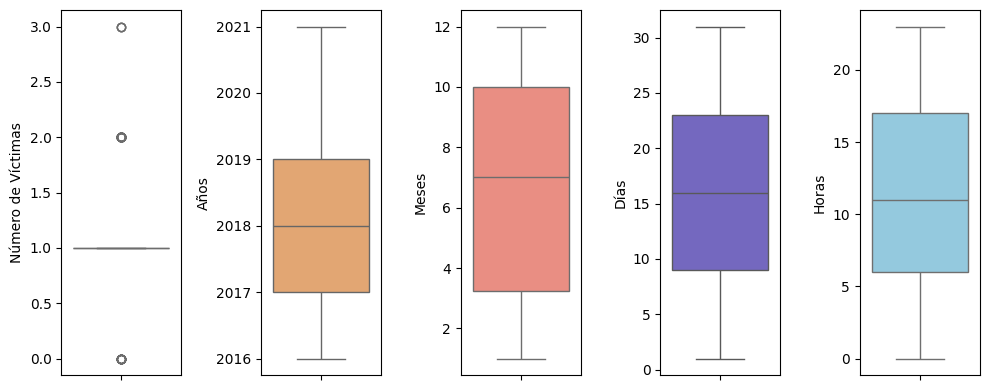

In [10]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Num víctimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='Año', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='Mes', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='Día', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='Hora', color = "#87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

#### **Conclusión**
- Los Outliers que se encuentran en feature `Num víctimas` (valores 2 ó 3), se producen debido a que en la mayoria de los casos el registro es el valor uno (1); con respecto a las victimas en los siniestros. 

### Mapa de correlacion | Mapa dde calor

Un mapa de correlación de calor, también conocido como mapa de calor de correlación, es una herramienta visual que muestra la correlación entre diferentes variables en un conjunto de datos utilizando colores para representar el grado de correlación.

En un mapa de calor de correlación, cada celda representa la correlación entre dos variables. El valor de la correlación se indica mediante colores, donde tonos más claros (por ejemplo, tonos de amarillo o blanco) indican una correlación positiva y tonos más oscuros (por ejemplo, tonos de azul o negro) indican una correlación negativa. El color más neutro (generalmente verde) puede representar una correlación cercana a cero o sin correlación.

En un análisis de víctimas de accidentes viales, un mapa de calor de correlación puede ser útil para identificar relaciones entre diferentes variables y entender cómo se relacionan entre sí. Por ejemplo, si observas una 
`correlación positiva entre las variables Edad y Hora eso podría indicar que hay una tendencia de que las personas de ciertas edades estén más involucradas en accidentes de tráfico a ciertas horas del día.`

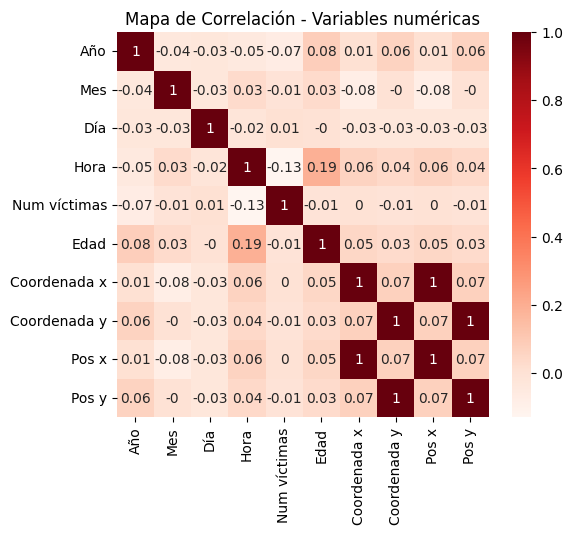

In [11]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="Reds", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

### **Conclusion:**

En un análisis de víctimas de accidentes viales, un mapa de calor de correlación se identifica las relaciones entre diferentes variables y entender cómo se relacionan entre sí. Por ejemplo, si observas una 
`correlación positiva entre las variables Edad y Hora eso podría indicar que hay una tendencia de que las personas de ciertas edades estén más involucradas en accidentes de tráfico a ciertas horas del día.`

El cruzamiento de todas las variables numéricas en la matriz resulta con relaciones positivas fuertes entre las features `Coordenada` y `Pos`, lo que resultaría un dato esperable.
Se puede verificar también una **correlacíon positiva leve** entre la variable `Edad` y `Hora`
Las demás correlaciones son negativas, hecho que se esperaba debido a que el `Num víctimas` de un siniestro no se vincula a una fecha u hora puntual.

Debido al objetivo de éste proyecto, que consiste en analizar los siniestros, con el fin de disminuir la cantidad de víctimas fatales; se define comenzar la exploración con la variable `Num víctimas`.

### `Num víctimas`
- Cantidad de víctimas fatales por siniestro vial

In [12]:
df["Num víctimas"].describe()

count    717.000000
mean       1.037657
std        0.294226
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

In [13]:
df["Num víctimas"].sum()

744

### Histograma | N° de Víctimas

Un histograma es una representación gráfica de la distribución de frecuencia de un conjunto de datos numéricos. Se utiliza para visualizar la distribución de los valores y entender cómo se agrupan en diferentes rangos. Los histogramas son útiles para identificar patrones, tendencias y características importantes en los datos, como la dispersión, la simetría y la presencia de valores atípicos.

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\935376369.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado, x='Num víctimas', palette=custom_palette)
C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\935376369.py:10: UserWarning: The palette list has more values (702) than needed (3), which may not be intended.
  sns.countplot(data=df_filtrado, x='Num víctimas', palette=custom_palette)


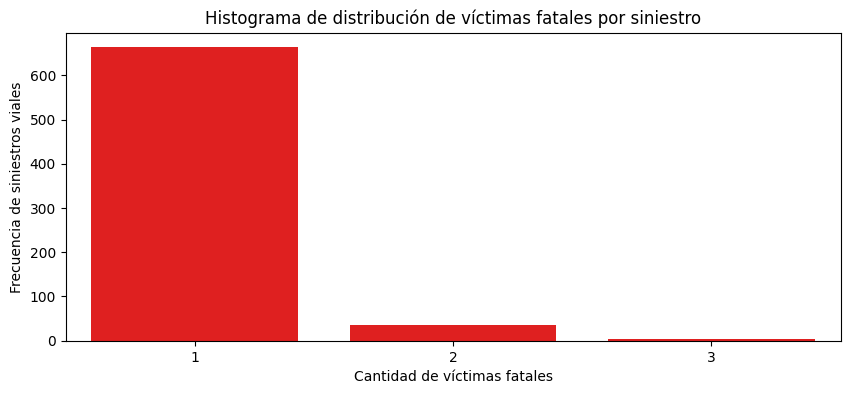

In [14]:
plt.figure(figsize=(10, 4))

# Filtrar los valores sin datos o nulos
df_filtrado = df[df["Num víctimas"] != 0]

# Definir una paleta de colores con todas las barras en rojo
custom_palette = ["red"] * len(df_filtrado["Num víctimas"])

# Graficar el histograma
sns.countplot(data=df_filtrado, x='Num víctimas', palette=custom_palette)

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

#### **Conclusión**
- La cantidad de víctimas fatales que arrojan los siniestros viales es de 1 (una), en la mayoría de los casos. 
- Según los datos estadísticos de la columna el 75% de los siniestros viales tienen 1 víctima.
- Rara vez resulta un siniestro con tres víctimas fatales 

## Análisis Temporal

Relación `Num vìctimas` con el tiempo - Distribución temporal

Se analizan los datos teniendo en cuenta diferentes horizontes temporales, para corroborar la existencia de algún tipo de evento o patrón importante.

In [15]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()

In [16]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016.0,1.0,8
1,2016.0,2.0,12
2,2016.0,3.0,15
3,2016.0,4.0,9
4,2016.0,5.0,7
...,...,...,...
67,2021.0,8.0,9
68,2021.0,9.0,4
69,2021.0,10.0,5
70,2021.0,11.0,8


In [17]:
#Para la realización del gráfico se transforman los datos a tipo int
rel_tiempo["Año"]= rel_tiempo["Año"].astype("Int64")
rel_tiempo["Mes"]= rel_tiempo["Mes"].astype("Int64")

In [18]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,9
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [19]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["Fecha"] = rel_tiempo["Año"].astype(str) + '-' + rel_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")


### Gráfico de dispersión | Temporal:

Gráfico de dispersión (plot) que muestra el número de víctimas en relación con los años, las variables involucradas son:

- **Variable numérica:** El número de víctimas. Esta es una variable numérica continua que representa la cantidad de víctimas en un año específico. Los valores pueden ser enteros o decimales, dependiendo de cómo se defina el número de víctimas.

- **Variable categórica:** El año. Esta es una variable categórica que representa diferentes años en los que ocurrieron los accidentes. Aunque los años se expresan como números, en el contexto del análisis, se consideran categorías discretas y no tienen un orden inherente.

Conclusiones y Análisis:

+ **Tendencia temporal:** Al observar el gráfico, puedes identificar la tendencia a lo largo del tiempo en cuanto al número de víctimas de accidentes viales. Es posible observar una reducción de la cantidad de victimas, luego una fuerte caida en el ños año de la pandemia, y luego una fuerta subida despues de la pandemia.

+ **Estacionalidad:** Dependiendo de la distribución de los datos, es posible que observes patrones estacionales en el número de víctimas. Por ejemplo, es común que haya picos de accidentes durante las vacaciones o en ciertas épocas del año.

+ **Identificación de anomalías:** El gráfico también puede ayudarte a identificar años atípicos en los que ocurrieron un número inusualmente alto o bajo de accidentes. Estas anomalías podrían ser el resultado de factores externos, cambios en las políticas de seguridad vial, eventos naturales, etc.

+ **Planificación de medidas preventivas:** Basándote en la tendencia temporal y los patrones identificados, puedes utilizar esta información para implementar medidas preventivas más efectivas en ciertos períodos del año o en áreas específicas donde se observan más accidentes.

En resumen, al analizar un gráfico de dispersión del número de víctimas en relación con los años, estás evaluando la relación entre una variable numérica (número de víctimas) y una variable categórica (años), lo que te permite  ` extraer conclusiones importantes sobre las tendencias temporales y estacionales de los accidentes viales y tomar acciones apropiadas en función de estos hallazgos.`

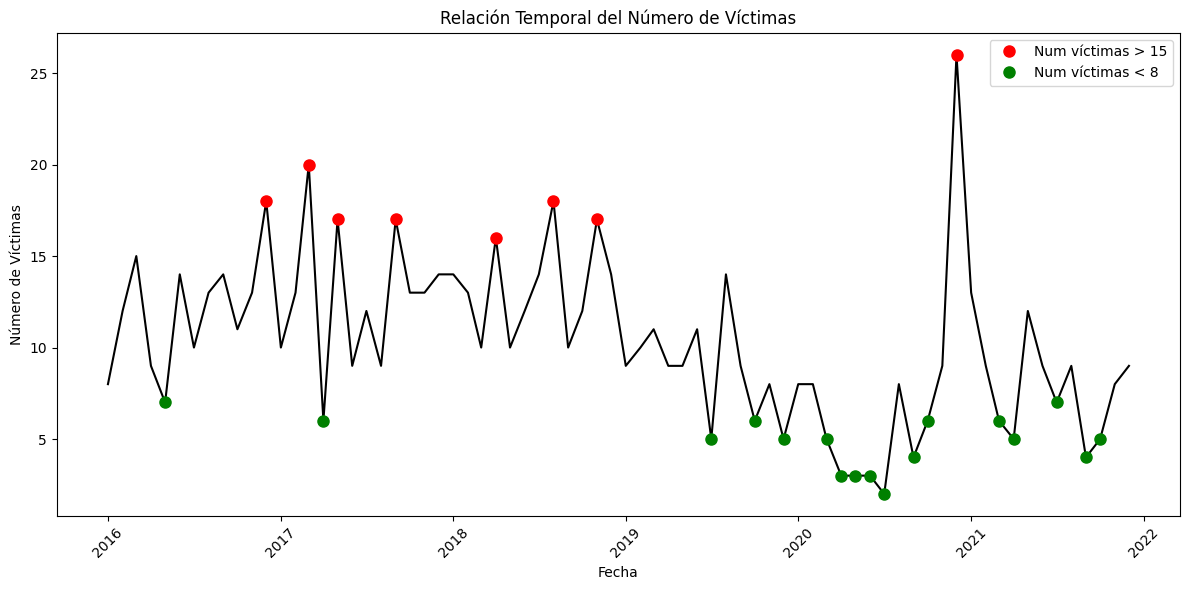

In [20]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Añadir la línea principal en negro
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], color='black')

# Identificar los puntos donde el número de víctimas sea mayor a 15
indices_mayor_15 = rel_tiempo[rel_tiempo["Num víctimas"] > 15].index

# Marcar esos puntos con un punto rojo
plt.plot(rel_tiempo["Fecha"].iloc[indices_mayor_15], rel_tiempo["Num víctimas"].iloc[indices_mayor_15], marker='o', color='red', linestyle='None', markersize=8, label='Num víctimas > 15')

# Identificar los puntos donde el número de víctimas sea menor a 8
indices_menor_8 = rel_tiempo[rel_tiempo["Num víctimas"] < 8].index

# Marcar esos puntos con un punto verde
plt.plot(rel_tiempo["Fecha"].iloc[indices_menor_8], rel_tiempo["Num víctimas"].iloc[indices_menor_8], marker='o', color='green', linestyle='None', markersize=8, label='Num víctimas < 8')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Conclusión**
- En el gráfico de la relación temporal del número de víctimas, se muestra como las fechas con mayor cantidad de siniestros fatales se dan durante 2017 y 2018; luego se percibe una disminución sostenida en los siguientes años. Sólo hubo un pico, a finales de 2020 superando el mayor número de víctimas mesuales a lo largo de los años analizados (26 víctimas fatales). 
- Durante el año 2020, la llegada de la pandemia COVID19; influyó notablemente en las estadísticas de siniestros viales

### Distribución temporal de víctimas 

#### Distribución mensual de víctimas fatales

Se crea un gráfico de barras que muestra la cantidad de víctimas por mes y agrega etiquetas de número de víctimas en cada barra.

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\3708836576.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette=custom_palette)


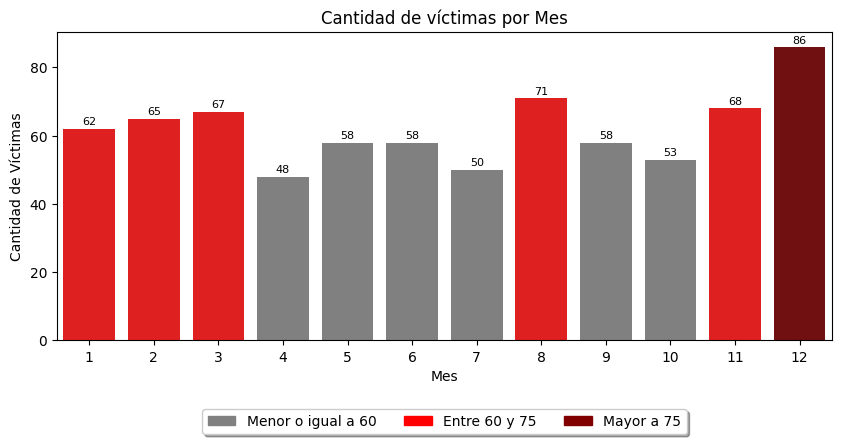

In [21]:
import matplotlib.patches as mpatches
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Se define una paleta de colores personalizada con gris por defecto
custom_palette = ['#808080' for _ in range(len(data["Mes"]))]

# Se definen los umbrales para resaltar los valores
umbral_60 = 60
umbral_75 = 75

# Se colorean las barras, resaltando los valores según los umbrales
for i in range(len(data["Num víctimas"])):
    if data["Num víctimas"][i] > umbral_75:
        custom_palette[i] = "#800000"  # Bordó oscuro
    elif data["Num víctimas"][i] > umbral_60:
        custom_palette[i] = "#FF0000"  # Rojo intenso

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette=custom_palette)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Leyenda personalizada
legend_elements = [
    mpatches.Patch(color='#808080', label='Menor o igual a 60'),
    mpatches.Patch(color='#FF0000', label='Entre 60 y 75'),
    mpatches.Patch(color='#800000', label='Mayor a 75')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)

# Se muestra el gráfico
plt.show()

#### Distribución diaria de víctimas fatales

Se crea un gráfico de barras que muestra la cantidad de víctimas por día y agrega etiquetas de número de víctimas en cada barra.

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\813900849.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette=custom_palette)


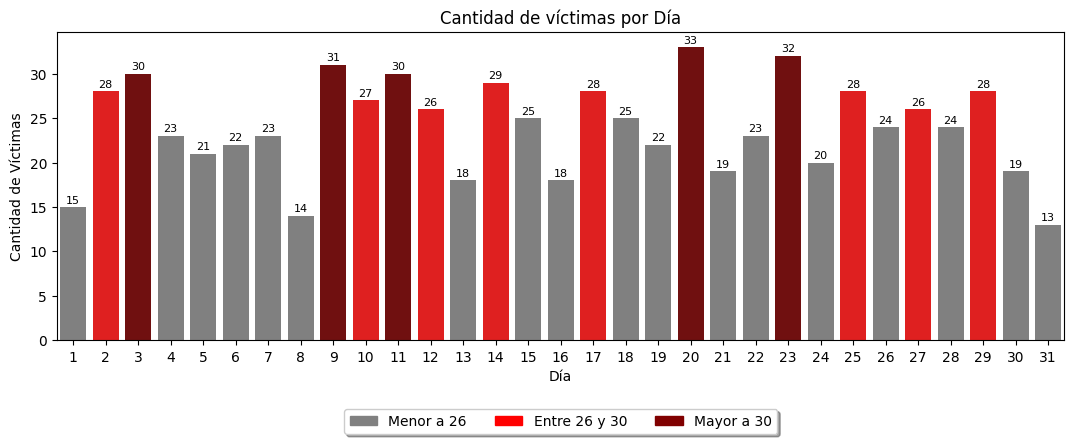

In [22]:
# Se agrupa por la cantidad de víctimas por día
data = df.groupby(['Día'])['Num víctimas'].sum().reset_index()
data["Día"]=data["Día"].astype("Int64")

# Se define una paleta de colores donde todas las barras son grises por defecto
custom_palette = ['#808080'] * len(data["Día"])

# Se define un umbral para resaltar los valores mayores o iguales a 26
umbral_rojo = 26
umbral_bordo = 30

# Se colorea las barras, resaltando los valores mayores o iguales a 26 y 30
for i in range(len(data["Num víctimas"])):
    if data["Num víctimas"][i] >= umbral_bordo:
        custom_palette[i] = "#800000"  # Reemplazar el color con bordo
    elif data["Num víctimas"][i] >= umbral_rojo:
        custom_palette[i] = "#FF0000"  # Reemplazar el color con rojo intenso

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette=custom_palette)
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Leyenda personalizada
legend_elements = [
    mpatches.Patch(color='#808080', label='Menor a 26'),
    mpatches.Patch(color='#FF0000', label='Entre 26 y 30'),
    mpatches.Patch(color='#800000', label='Mayor a 30')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)

# Se muestra el gráfico
plt.show()

Se crea un gráfico de barras que muestra la cantidad de víctimas por día de la semana y agrega etiquetas de número de víctimas en cada barra.

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\1596382184.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette=custom_palette)


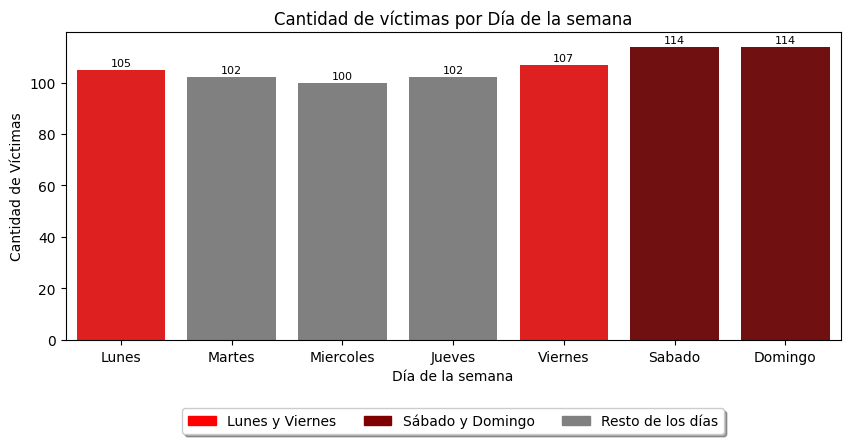

In [23]:

# Se agrupa por la cantidad de víctimas por día de la semana
data = df.groupby(['Día semana'])['Num víctimas'].sum().reset_index()

# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')

# Se define una paleta de colores donde lunes y viernes son rojos, sábados y domingos son bordo, y los demás días son grises por defecto
custom_palette = ['#FF0000' if dia in ["Lunes", "Viernes"] else '#800000' if dia in ["Sabado", "Domingo"] else '#808080' for dia in data["Día semana"]]

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette=custom_palette)
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día de la semana') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Leyenda personalizada
legend_elements = [
    mpatches.Patch(color='#FF0000', label='Lunes y Viernes'),
    mpatches.Patch(color='#800000', label='Sábado y Domingo'),
    mpatches.Patch(color='#808080', label='Resto de los días')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)

# Se muestra el gráfico
plt.show()

#### Distribución relacionando horas y días, de víctimas fatales

Se crea un mapa de calor donde el eje x representa las horas del día, el eje y representa los días de la semana y el color de cada celda indica el número de víctimas. Se utiliza Seaborn para crear el mapa de calor y el argumento annot=True agrega los valores numéricos en las celdas del mapa de calor.

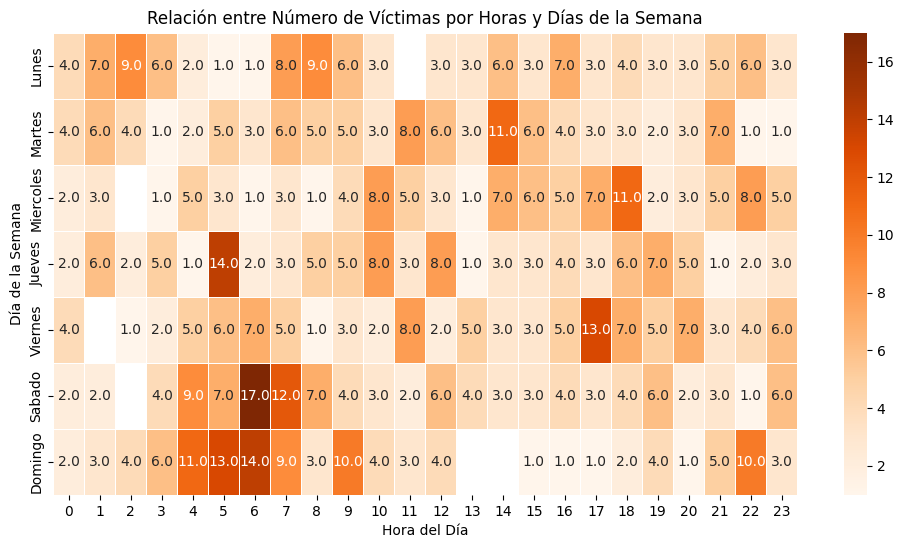

In [24]:
# Agrupa los datos en cantidad de víctimas por día de la semana y horas
data = df.groupby(['Día semana', "Hora"])['Num víctimas'].sum().reset_index()
data["Hora"] = data["Hora"].astype("Int64")

# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')

# Crear una tabla pivot para los datos
pivot_data = data.pivot_table(index='Día semana', columns='Hora', values='Num víctimas', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dias_semana)

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='Oranges', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Mostrar el gráfico
plt.show()


#### **Conclusión**
- El mes con mayor cantidad de `víctimas fatales` (86) es Diciembre .
- El `Día ` 20 de cada mes es el que lleva el mayor número de víctimas y los días `Sábado y Domingo` tienen la suma de 114 víctimas fatales, siendo la mayor cantidad.
- El mapa de calor indica que los días de fin de semana, en especial sábados y domingos se encuentran con un número más alto de víctimas fatales, siendo las horas entre 03.00 hs y 09.00 hs 

Puede decirse que los horarios con mayor peligrosidad tienen que ver con el ingreso laboral (05:00 hs - 09:00 hs), el horario del mediodía (12:00 hs - 14:00 hs) y salida del trabajo (17:00 hs - 18:00 hs). Durante la madrugada existen pocos siniestros. Y los fines de semana los la cantidad de siniestros es poca pero con mayor cantidad de víctimas

### `Edad` de las víctimas

Se crea un histograma de edades de las víctimas fatales y se utiliza el mismo eje para mostrar las estadísticas de la columna edades a través de un boxplot

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\113864707.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Edad'], kde=True, ax=ax[0], palette=custom_palette) # se agrega la línea de suavizado


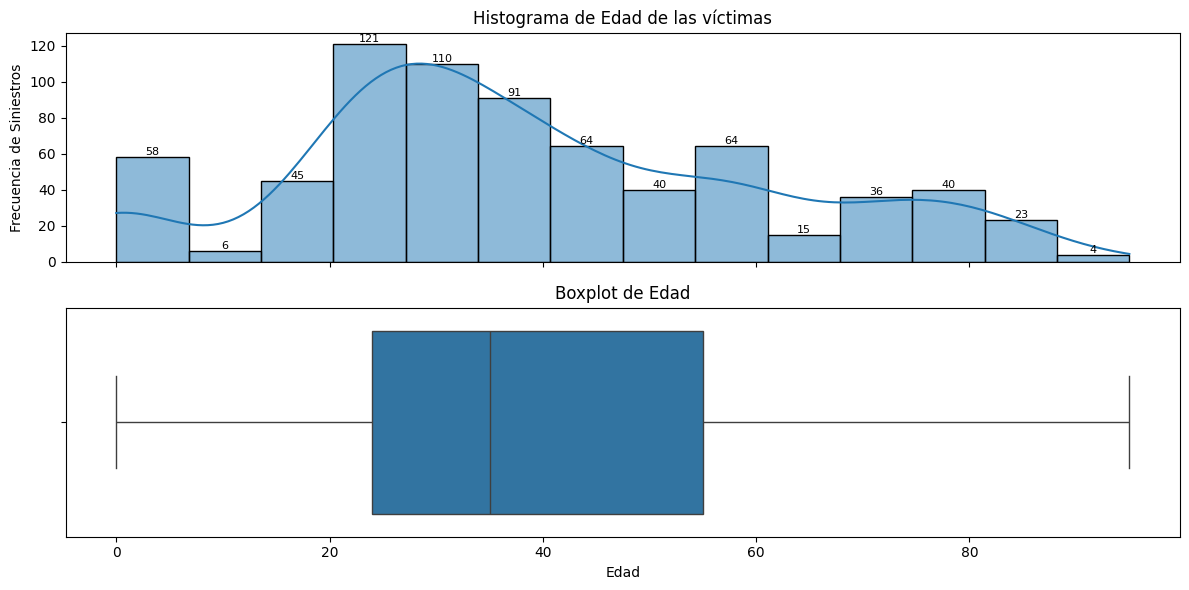

In [25]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Define una paleta de colores personalizada: gris por defecto y rojo para edades entre 25 y 55 años
custom_palette = ['#FF0000' if 25 <= edad <= 55 else '#808080' for edad in df['Edad']]

# Se grafica el histograma de la edad
sns.histplot(df['Edad'], kde=True, ax=ax[0], palette=custom_palette) # se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=df['Edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

In [26]:
df["Edad"].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54,  0, 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40, 87,
       76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39, 28,
        7, 48,  4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85,  1, 15, 13,
       77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,  5,
       88], dtype=int64)

In [27]:
df["Edad"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

En una visualización en general se puede observar que el 75% de las víctimas fatales es menor que 55 años, la mediana es de 39 años.
Con respecto a la distribución del histograma, puede concluirse que la mayor cantiad de víctimas fatales se concentra entre los 20 a 40 años de edad

### Relación de `Edad` de las víctimas con la `Hora` del siniestro

Se realiza el análisis de ésta relación que resultó positiva en la matriz de correlación en las variables numéricas.
Se crea un gráfico de dispersión que representa la relación entre la edad de las víctimas en el eje x y la hora del siniestro en el eje y. 



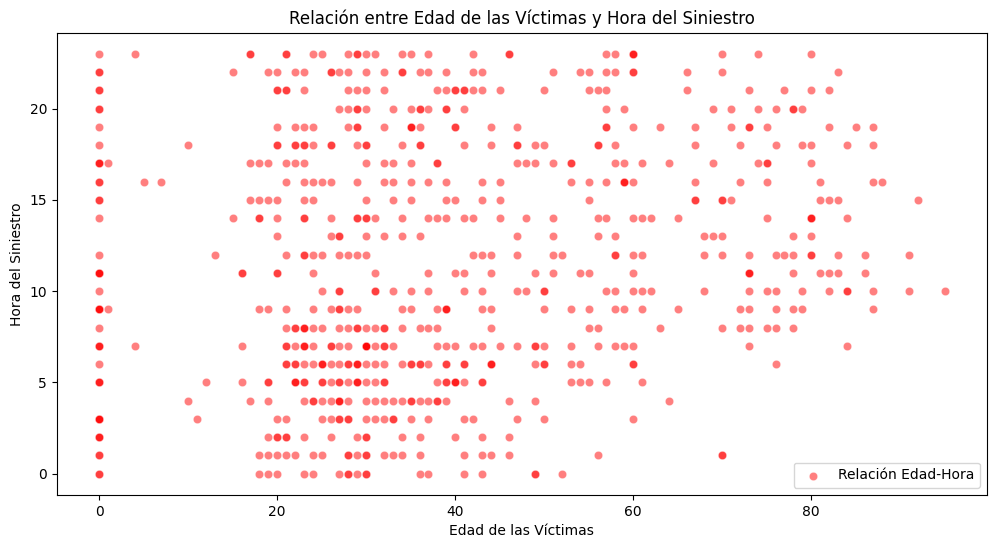

In [28]:
# Agrupa los datos en cantidad de víctimas por edad y horas 
data = df.groupby(['Edad', "Hora"])['Num víctimas'].sum().reset_index()
data["Edad"]=data["Edad"].astype("Int64")
data["Hora"]=data["Hora"].astype("Int64")

# Crear un gráfico de dispersión para la relación entre edad y hora
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Edad', y='Hora', alpha=0.5, color='red', label='Relación Edad-Hora') # se utiliza alpha para transparencia de los puntos
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas y Hora del Siniestro')

# Agregar una leyenda
plt.legend(loc='best') 
# Mostrar el gráfico
plt.show()


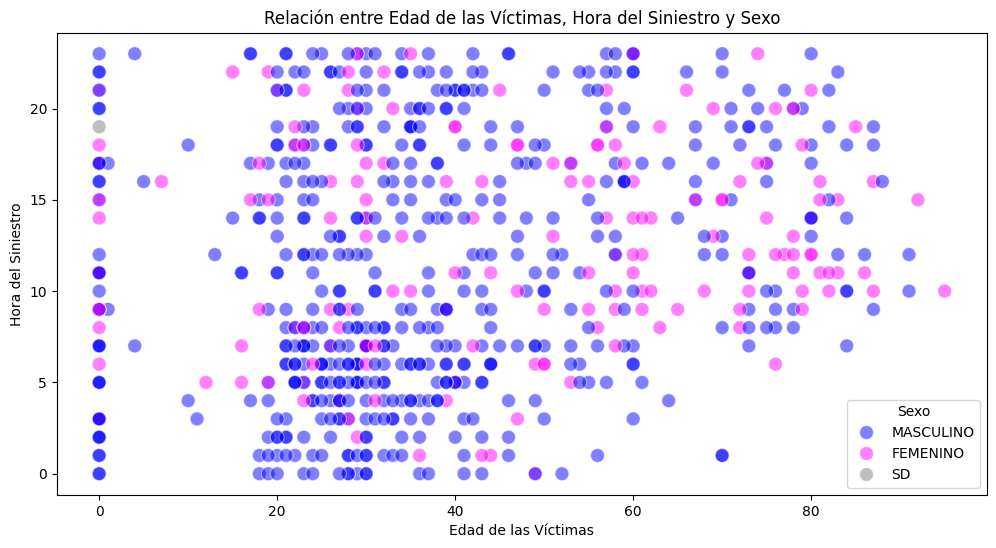

In [29]:
# Agrupa los datos en cantidad de víctimas por edad, hora y sexo
data = df.groupby(['Edad', "Hora", "Sexo"])['Num víctimas'].sum().reset_index()
data["Edad"]=data["Edad"].astype("Int64")
data["Hora"]=data["Hora"].astype("Int64")

# Crear un gráfico de dispersión para la relación entre edad, hora y sexo
plt.figure(figsize=(12, 6))

# Define una paleta de colores personalizada
custom_palette = {'FEMENINO': 'fuchsia', 'MASCULINO': 'blue', 'SD': 'gray'}  # Cambia 'pink' por 'fuchsia'

sns.scatterplot(data=df, x='Edad', y='Hora', hue='Sexo', alpha=0.5, palette=custom_palette, s=100)

# Agregar etiquetas a los ejes
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Hora del Siniestro y Sexo')

# Agregar una leyenda
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()


#### **Conclusión**
- Las gráficas de dispersión presentadas arriba, señalan la relación entre las edades de 20 a 40 años de las víctimas y las horas de mayor cantidad de ocurrencia de siniestros viales; siendo entre las 5 a 9 hs y 17 a 18 hs
- Cuando se le agrega la distinción por Sexo, se muestra una mayor cantidad de víctimas `Masculinas`, con respecto a las `Femeninas` en ésta relación

### Distribución etaria  de víctimas según `Sexo`

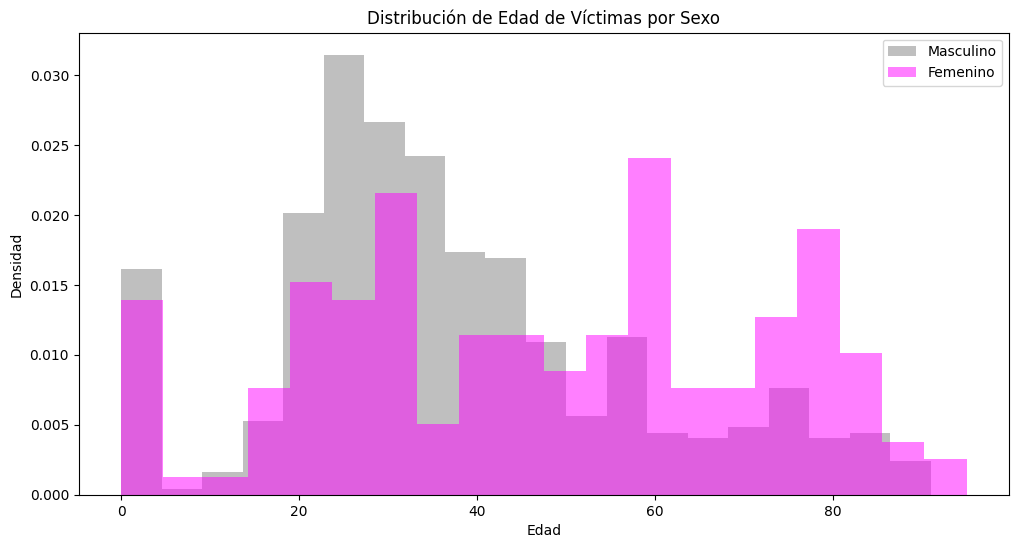

In [30]:
# Filtrar por sexo masculino
masculino = df[df['Sexo'] == 'MASCULINO']['Edad'].dropna()

# Filtrar por sexo femenino
femenino = df[df['Sexo'] == 'FEMENINO']['Edad'].dropna()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='grey', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='fuchsia', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#### **Conclusión**
El gráfico muestra dos histogramas sobre el mismo eje a fin de poder comparar de manera más visual la diferencia entre las víctimas de ambos sexos.
- como resultado arroja que las victimas de sexo Masculino son de 20 a 40 años de Edad
- las víctimas de sexo Femenino son de entre 40, 60 y 80 años de Edad.

### Distribución temporal de las Edades de las víctimas

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\2135354082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Edad', data=df, palette="winter")


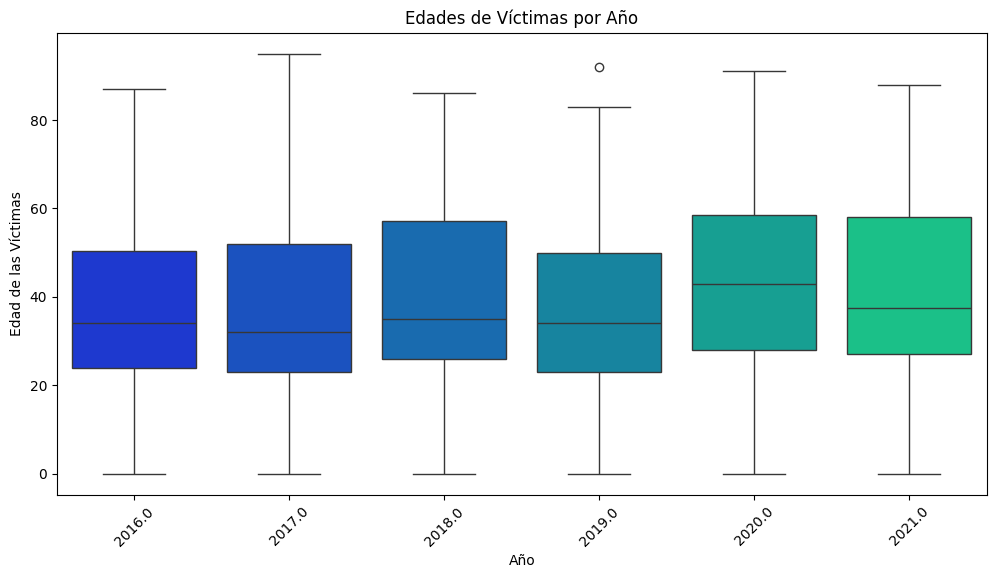

In [31]:

#Agrupa los datos en cantidad de victimas por edad y  año
data = df.groupby(['Edad', "Año"])['Num víctimas'].sum().reset_index()


#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=df, palette="winter")

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()


#### **Conclusión**
El gráfico confirma que a través del tiempo, la mediana de la edad de las víctimas sigue siendo alrrededor de los 39 años y supera esta barrera en el año 2020

### Distribución espacial de los siniestros con víctimas `Coordenadas`

Para usar Geopandas, primero se define un sistema de referencia de coordenadas (CRS) y éste le dice a Python como se relacionan estas coordenadas que instanciamos con los diferentes lugares del planeta

In [32]:
# Iniciamos CRS

crs={'init':'epsg:4326'}

In [33]:
#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(df["Pos x"], df["Pos y"])]

c:\Users\NoxiePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

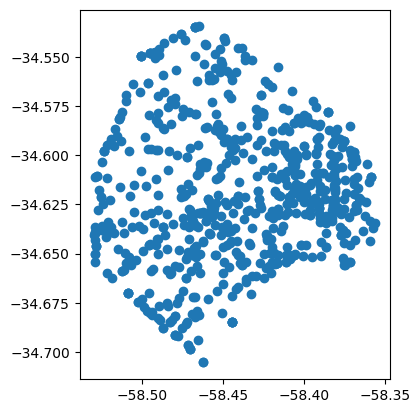

In [34]:
#Ua vez que tenemos el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)

#Se imprime el resultante que luego será introducido en un mapa
geodata.plot()

Una vez que el mapa de geometría está listo, se debe cargar el archivo de las comunas del la ciudad de Buenos Aires que se extrajo de https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource que debe ser un archivo Shapefile (SHP)

In [35]:
#Extraer el archivo
shapefile = gpd.read_file("comunas_wgs84.shp")

Text(158.98305973900304, 0.5, 'Latitud')

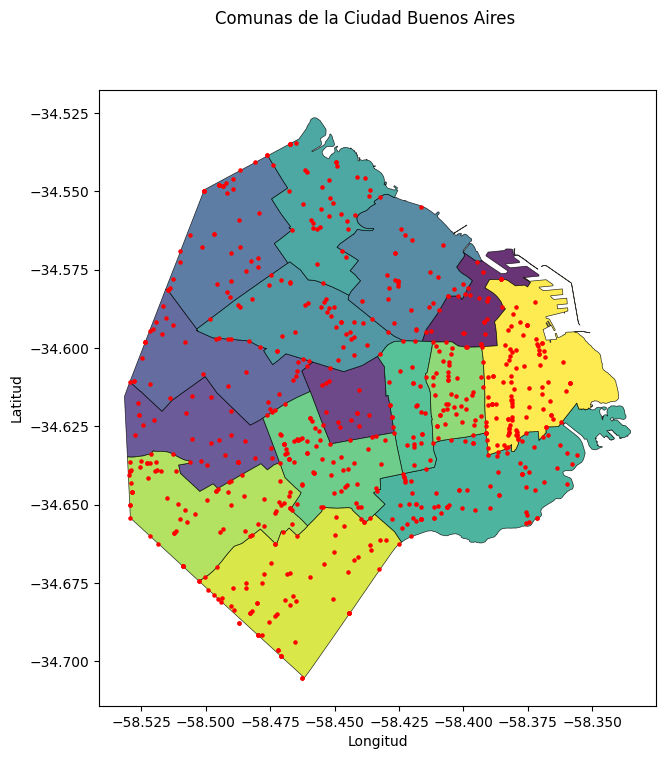

In [36]:
#Se realiza sobre el mapa de CABA la presentación de los puntos de referencia a los siniestros viales

#Crea ejes y figuras
fig, ax = plt.subplots(figsize=(10,8))

#Dibujar el Shapefile
shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")

#Dibujar los datos geoespaciales
geodata.plot(ax=ax, color='red', markersize=5);

#Agregar título y etiquetas de ejes
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

#### **Conclusión**
- La gráfica muestra la concentración de los puntos rojos representando siniestros con víctimas fatales, hacia la zona Este del mapa de CABA sobre la comuna 1 y 4

### B - Variables Categóricas

### Distribución por `Comuna`

In [37]:
#Se crea un dataset con el número de víctimas por Barrio y Comuna
Total_comuna=df.groupby(["Comuna", "Barrios"])["Num víctimas"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="Num víctimas", ascending=False)
Total_comuna

,Comuna,Barrios,Num víctimas
0,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101
9,Comuna 4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,81
14,Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,74
13,Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,70
12,Comuna 7,FLORES - PARQUE CHACABUCO,65
8,Comuna 3,BALVANERA - SAN CRISTOBAL,48
6,Comuna 15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
3,Comuna 12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43
4,Comuna 13,BELGRANO - COLEGIALES - NUÃ‘EZ,39
5,Comuna 14,PALERMO,38


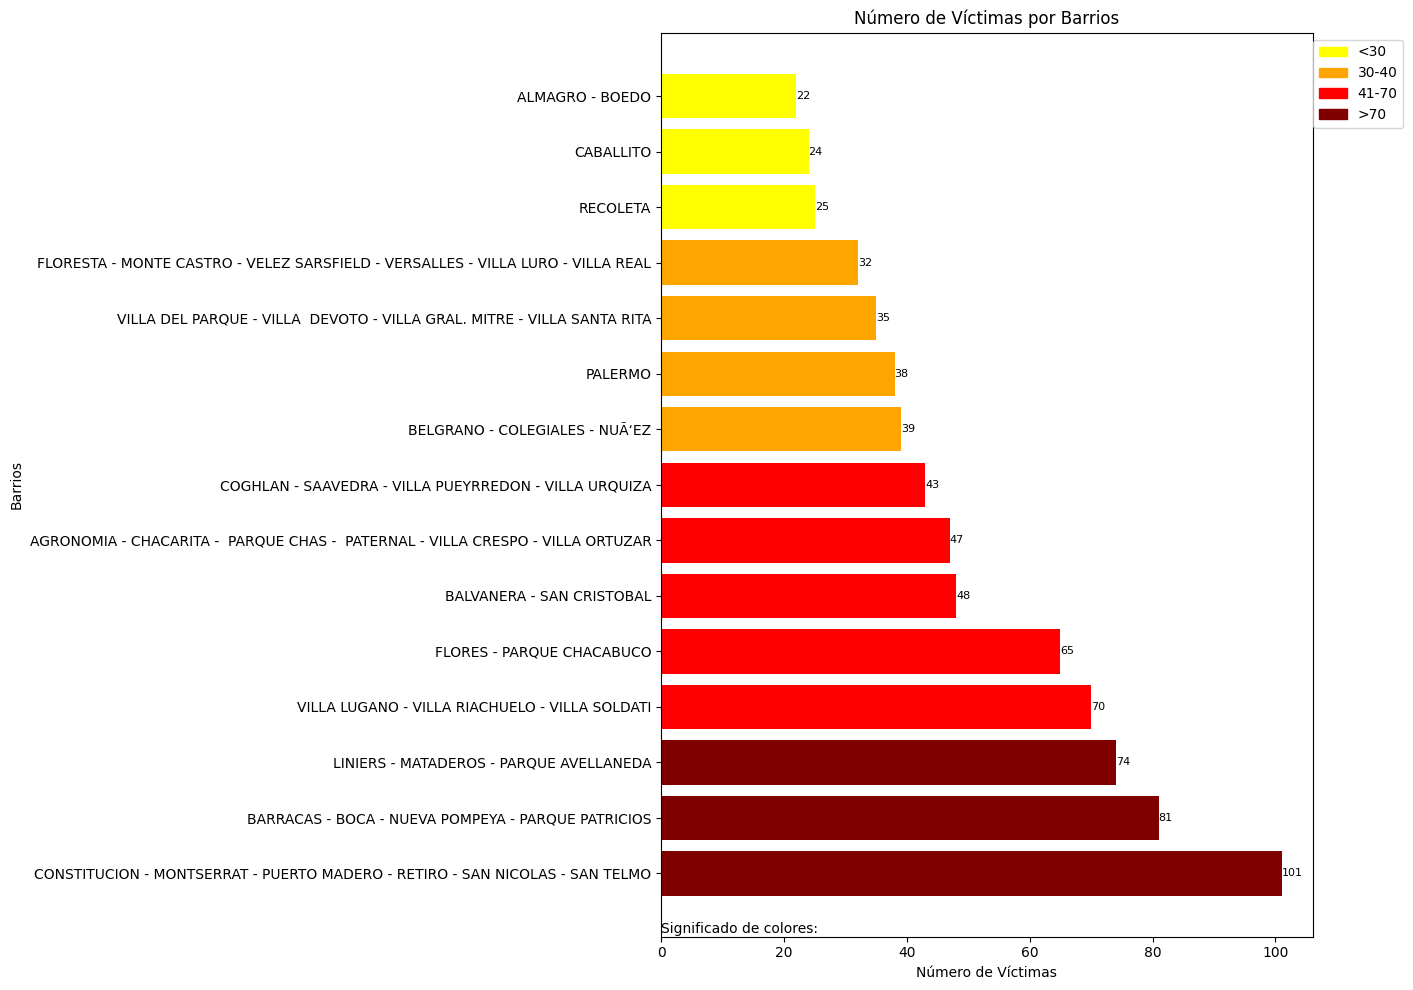

In [38]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Colores para las barras según los rangos definidos
colores = []
for num_victimas in Total_comuna["Num víctimas"]:
    if num_victimas > 70:
        colores.append('maroon')  # Bordó
    elif num_victimas > 40:
        colores.append('red')     # Rojo
    elif num_victimas > 30:
        colores.append('orange')  # Naranja
    else:
        colores.append('yellow')  # Amarillo

# Dibujar las barras horizontales
plt.barh(Total_comuna["Barrios"], Total_comuna["Num víctimas"], color=colores)

# Etiquetas de eje x e y
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios')

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(Total_comuna["Num víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')

# Agregar leyenda fuera del gráfico
legend_labels = ['<30', '30-40', '41-70', '>70']
legend_colors = ['yellow', 'orange', 'red', 'maroon']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
plt.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.15, 1))

# Agregar etiqueta de significado de colores debajo del gráfico
plt.text(0, -1, 'Significado de colores:', fontsize=10, ha='left', va='center')

plt.tight_layout()
plt.show()

#### **Conclusión**
- El dataset presenta el total de 15 comunas que conforman los distintos barrios de CABA. Cada comuna esta formada por uno o varios Barrios.
- De la tabla `Total_comunas` resultan con mayor cantidad de víctimas fatales las Comunas 1, 4, 9, 8 y 7.
- La comuna 1 supera por 20 en víctimas a la comuna 4, que le sigue en orden 

Ello sugiere que pueden ser Barrios donde existan arterias muy transitadas al momento de la entrada ó salida del horario laboral

### Distribución de los `Tipos de Calles` donde suceden los siniestros

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\713621936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x='Tipo de calle', palette="winter")


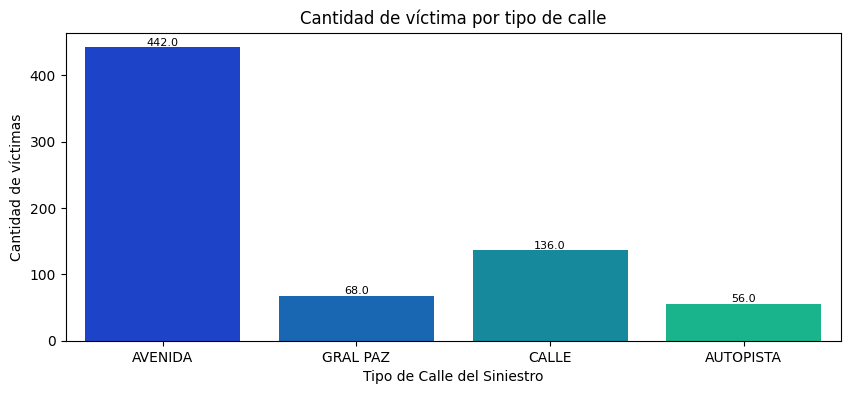

In [39]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(df, x='Tipo de calle', palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

#### **Conclusión**
- Del análisis del gráfico resulta que el mayor número de víctimas fatales se producen en `Avenida`; secundado por `Calle`.

### Distribución de `Participantes` en los siniestros

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_9464\3601797418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Participantes", palette="winter")


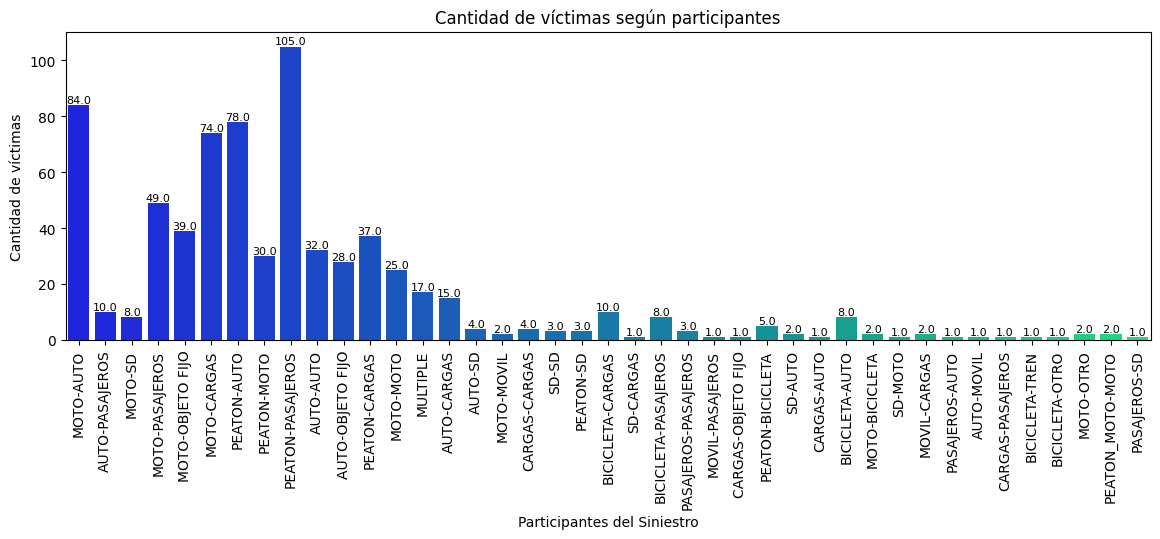

In [40]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

#### **Conclusión**
- Los valores de participación que concentran más víctimas están en `PEATON-PASAJEROS`, esto según el diccionario de datos, se refiere a Peatón: es cualquier víctima distinta de cualquier ocupante de un vehículo; Pasajero: es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.
- Le siguen en importancia de víctimas `MOTO-AUTO` , `PEATON-AUTO` y `MOTO-CARGAS`

En la columna `Participantes` puede interpretarse que la primer palabra se relaciona a quien fue la `Víctima` y la segunda palabra se refiere al `Acusado`

### Distribución de `Acusados` en los siniestros

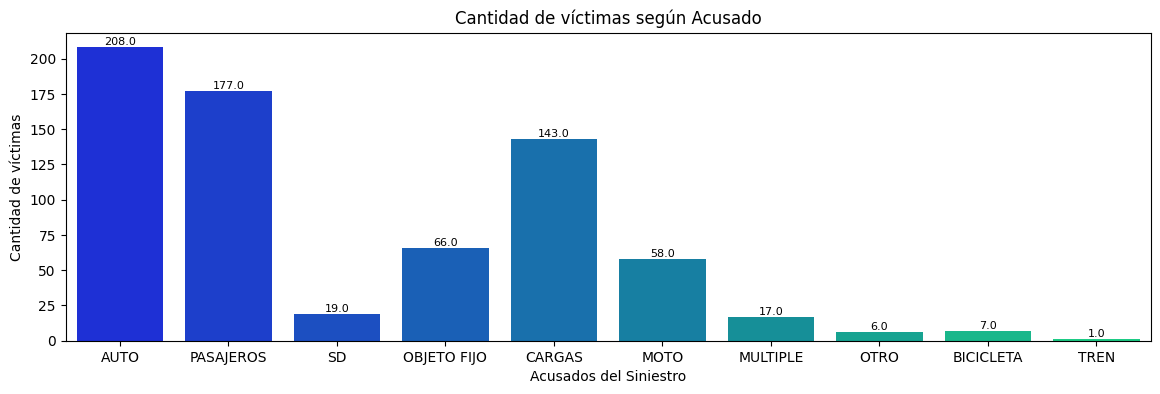

In [ ]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

#### **Conclusión**
- Se puede visualizar que los que causan más víctimas son los  `Autos`, `Cargas` y `Pasajeros`. Esto se relaciona con el punto anterior.

### Distribución de `Víctimas` en los siniestros

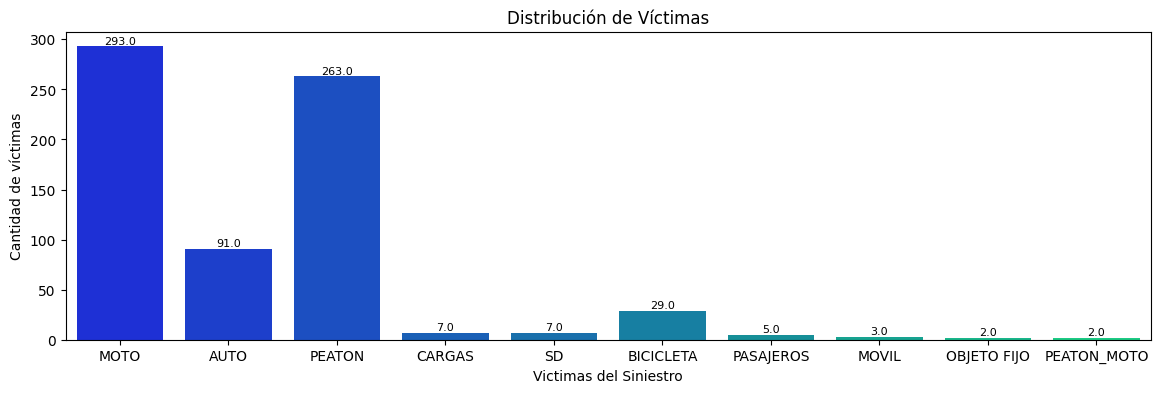

In [ ]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Victima", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

#### **Conclusión**
- Se puede visualizar que las víctimas son  `Moto`, `Peaton` y `Carga`. Esto se relaciona con ambos puntos anteriores.

### Matriz de confusión 

Se crea una tabla ce contingencia que relacione los datos de las columnas `Víctima` y `Acusado` para analizar de manera más visual los datos de los siniestros y sus participantes.

In [ ]:
tabla_contingencia = pd.crosstab(df['Victima'], df['Acusado'])

# Visualizar la tabla de contingencia
tabla_contingencia

Acusado,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
Victima,,,,,,,,,,
AUTO,32,0,15,0,3,26,1,10,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,84,2,74,25,8,39,4,49,8,0
MOVIL,0,0,2,0,0,0,0,1,0,0
OBJETO FIJO,2,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,78,5,37,30,5,0,0,105,3,0
PEATON_MOTO,0,0,0,2,0,0,0,0,0,0


#### **Conclusión**
Aquí se encuentran de manera más clara en sus resultados la intervención en cada siniestro.
- Cuando el acusado es `Auto`, la mayoría de las víctimas son Autos, Motos y Peatones.
- Cuando el acusado es `Cargas`, las victimas son variadas; siendo Motos y Peatones los más encontrados.
- Cuando el acusado es `Pasajeros`, las víctimas son principalmente Peatones y Motos.

La frecuencia de víctimas Motos y Peatones es alta, y se relacionan con casi todos los tipos de Acusados.


### Proporción de víctimas por `Sexo`

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

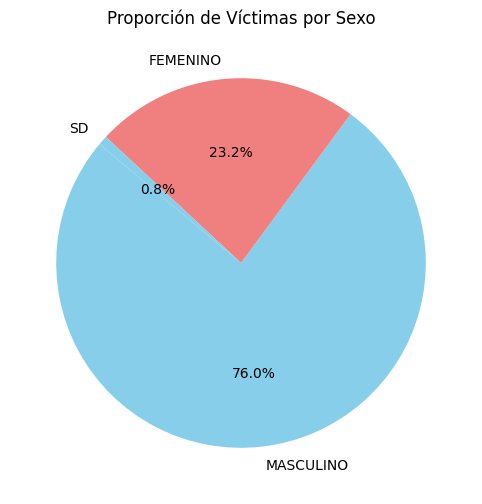

In [ ]:
# Calcular la proporción de víctimas por sexo
proporcion = df['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

### Distribución de los roles de las víctimas por `Sexo`

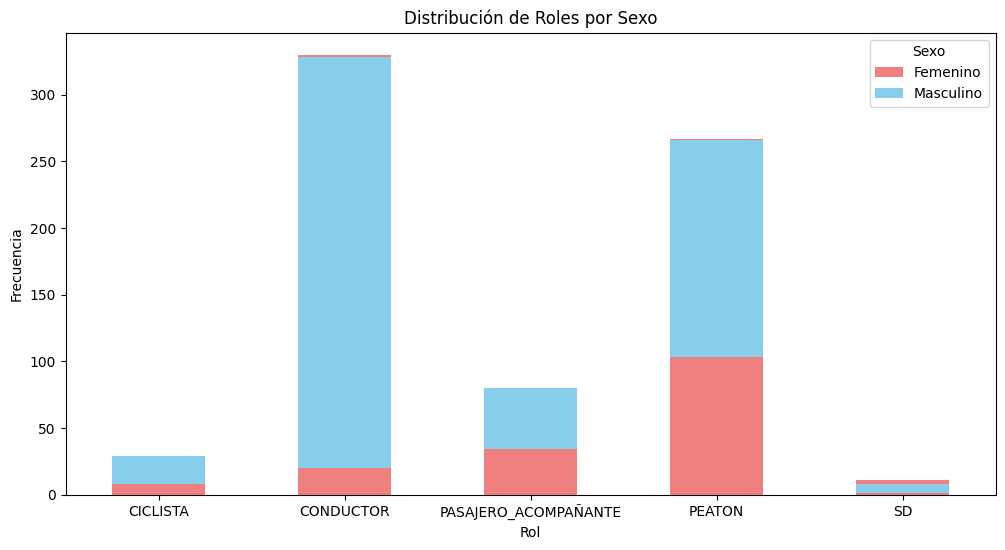

In [ ]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Rol'], df['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

#### **Conclusión**
La distribución por roles de las víctimas muestra que
- la mayor cantidad de siniestros las victimas tienen como rol `Conductor`, seguida por `Peatón`.
- para las víctimas de sexo `Masculino`, el rol más frecuente en los siniestros es como conductor, seguido por peatón.
- para las víctimas de sexo `Femenino`, el rol más frecuente en los siniestros es como peatón, seguido por pasajero-acompañante

### Distribucíon de víctimas según `sexo` y `tipo de vehículo`

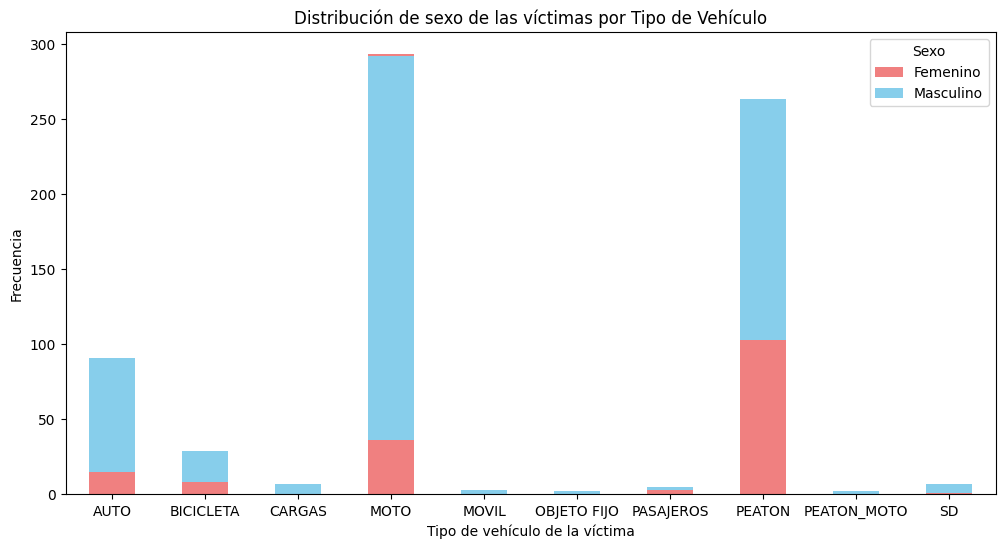

In [ ]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Victima'], df['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

#### **Conclusión**

- La mayor cantidad de accidentes con víctimas fatales son en `Moto` y además con más proporción de Masculinos
- Los `Peatones`, son el segundo tipo de víctima, en el que la mayor proporción son Masculinos pero con menor diferencia que en la primera.